<a href="https://colab.research.google.com/github/AbelJames26/Project_Mining/blob/main/project12112022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import all Libraries 

In [173]:
import numpy as np
import pandas as pd
import scipy as sp
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import sqlite3
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
print(tf.__version__)

2.9.2


Import Data Set

In [146]:
Path = "/content/Project_Data.csv"
df = pd.read_csv(Path)
df.shape

(264, 20)

Visualize dataset

In [147]:
#Displaying the data
df.head()

,PROJECT_CODE,PROJECT_NAME,PROJECT_SHORT,PRIMARY COMMODITY,SITE_CODE,LATITUDE,LONGITUDE,SITE_LOCATION,ESTIMATING COMMODITY,EST_COM_AB,EST_COM_P,TOTAL_MINERAL_RESOURCES (Mt),TOTAL_MINERAL_RESOURCES_AVG_GRADE_(g/t),RES_CON_(Kg),RV_QTY_G_(g/t),RV_CON_(Kg),POINT_SIZE (Kg),Date,Gold_Value,RV_QTY_(Mt)
0,J05288,8 Mile Dam,8 Mile Dam,Gold,S0236141,-30.645288,121.462217,Eastern Goldfields Superterrane,Gold,Au,Yes,7.014346,1.392000,9763.969632,2.099000,558.00000,9763.969632,1/10/2022,1662.4,1.670000
1,J02707,Goodenough / Kairiki,Goodenough,Gold,S0020062,-29.676897,121.077914,Eastern Goldfields Superterrane,Gold,Au,Yes,0.715700,1.971598,1411.073000,3.365000,20642.21000,1411.073000,1/10/2022,1662.4,1.354000
2,J04664,Ora Banda / Norton,Ora Banda,Gold,S0000642,-30.372109,121.088425,Eastern Goldfields Superterrane,Gold,Au,Yes,17.790000,1.859798,33085.800000,2.276660,14718.87760,47804.677600,1/10/2022,1662.4,34.057692
3,J00292,Paddington - Mt Pleasant,Paddington - Mt Pleasant,Gold,S0000566,-30.556269,121.227040,Eastern Goldfields Superterrane,Gold,Au,Yes,59.980000,2.251367,135037.000000,1.798119,15923.12736,150960.127400,1/10/2022,1662.4,34.251312
4,J01022,Abednego West,Abednego West,Gold,S0002219,-28.833347,121.773913,Eastern Goldfields Superterrane,Gold,Au,Yes,0.070000,2.100000,147.000000,1.864000,2.88800,147.000000,2/10/2022,1662.4,2.230000


Visualize Ore reserve locations 

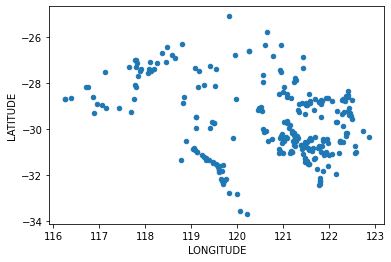

In [148]:
df.plot(kind="scatter", x="LONGITUDE", y="LATITUDE")

Check for Null Values

In [149]:
# Checking the null values

df.isna().any()

PROJECT_CODE                               False
PROJECT_NAME                               False
PROJECT_SHORT                              False
PRIMARY COMMODITY                          False
SITE_CODE                                  False
LATITUDE                                   False
LONGITUDE                                  False
SITE_LOCATION                              False
ESTIMATING COMMODITY                       False
EST_COM_AB                                 False
EST_COM_P                                  False
TOTAL_MINERAL_RESOURCES (Mt)               False
TOTAL_MINERAL_RESOURCES_AVG_GRADE_(g/t)    False
RES_CON_(Kg)                               False
RV_QTY_G_(g/t)                             False
RV_CON_(Kg)                                False
POINT_SIZE (Kg)                            False
Date                                       False
Gold_Value                                 False
RV_QTY_(Mt)                                False
dtype: bool

Count the number of Null Values in Each Column

In [150]:
# Count number of null values in each columns

df.isna().sum()

PROJECT_CODE                               0
PROJECT_NAME                               0
PROJECT_SHORT                              0
PRIMARY COMMODITY                          0
SITE_CODE                                  0
LATITUDE                                   0
LONGITUDE                                  0
SITE_LOCATION                              0
ESTIMATING COMMODITY                       0
EST_COM_AB                                 0
EST_COM_P                                  0
TOTAL_MINERAL_RESOURCES (Mt)               0
TOTAL_MINERAL_RESOURCES_AVG_GRADE_(g/t)    0
RES_CON_(Kg)                               0
RV_QTY_G_(g/t)                             0
RV_CON_(Kg)                                0
POINT_SIZE (Kg)                            0
Date                                       0
Gold_Value                                 0
RV_QTY_(Mt)                                0
dtype: int64

Drop NA Values if count is less than 5%

In [151]:
# We can drop the null value as their count is less than 5%

df.dropna(inplace=True)

Visualize variables after creating dependencies

This is the variable we will try to predict. Reserve quantity in Mt

In [152]:
y.head()

,RV_QTY_(Mt)
0,1.670000
1,1.354000
2,34.057692
3,34.251312
4,2.230000


Remove variables not used for prediction

In [153]:
df = df.drop([ "PROJECT_NAME", "PROJECT_CODE","PROJECT_SHORT","PRIMARY COMMODITY","SITE_CODE", "SITE_LOCATION", "ESTIMATING COMMODITY", "EST_COM_AB","EST_COM_P","Date" ,"LATITUDE", "LONGITUDE"], axis =1)

In [154]:
df

,TOTAL_MINERAL_RESOURCES (Mt),TOTAL_MINERAL_RESOURCES_AVG_GRADE_(g/t),RES_CON_(Kg),RV_QTY_G_(g/t),RV_CON_(Kg),POINT_SIZE (Kg),Gold_Value,RV_QTY_(Mt)
0,7.014346,1.392000,9763.969632,2.099000,558.00000,9763.969632,1662.4,1.670000
1,0.715700,1.971598,1411.073000,3.365000,20642.21000,1411.073000,1662.4,1.354000
2,17.790000,1.859798,33085.800000,2.276660,14718.87760,47804.677600,1662.4,34.057692
3,59.980000,2.251367,135037.000000,1.798119,15923.12736,150960.127400,1662.4,34.251312
4,0.070000,2.100000,147.000000,1.864000,2.88800,147.000000,1662.4,2.230000
...,...,...,...,...,...,...,...,...
259,0.169000,2.554438,431.700000,2.648000,46174.44000,431.700000,1639.6,32.368000
260,10.073000,1.643145,16551.400000,2.183200,414.55000,16551.400000,1639.6,37.086300
261,0.092000,1.978043,181.980000,2.470000,3445.55000,181.980000,1639.6,25.288000
262,0.915000,4.681311,4283.400000,4.650000,31855.00000,4283.400000,1635.9,4.598000


Split Data into Training and Test set. 80& and 20% respectively.



In [155]:
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)

Inspect the training data

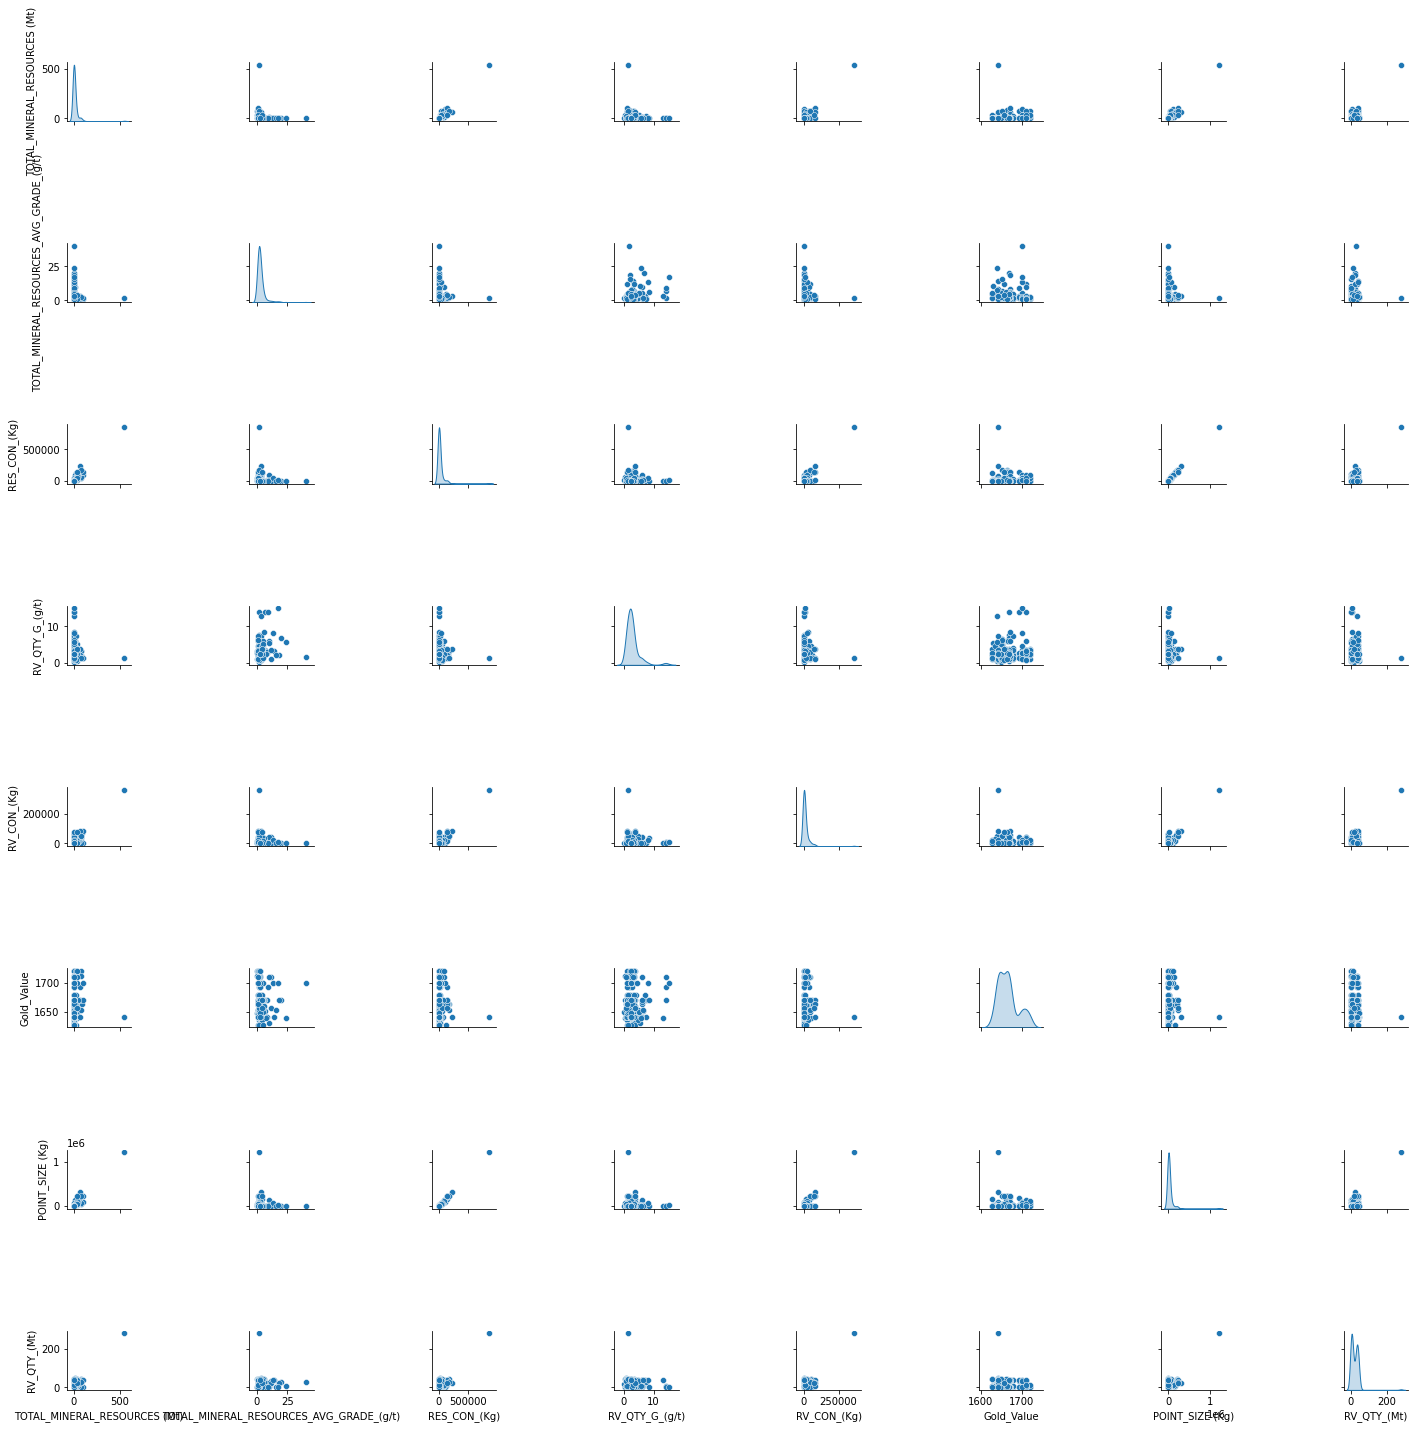

In [156]:
sns.pairplot(train_dataset[["TOTAL_MINERAL_RESOURCES (Mt)","TOTAL_MINERAL_RESOURCES_AVG_GRADE_(g/t)", "RES_CON_(Kg)","RV_QTY_G_(g/t)","RV_CON_(Kg)","Gold_Value", "POINT_SIZE (Kg)", "RV_QTY_(Mt)"]], diag_kind = "kde")

Observe Overall statistics

In [157]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TOTAL_MINERAL_RESOURCES (Mt),211.0,12.358104,41.887437,0.003,0.228500,1.2960,7.142573,545.967
TOTAL_MINERAL_RESOURCES_AVG_GRADE_(g/t),211.0,3.349571,4.162762,0.500,1.526122,2.1000,3.270000,40.000
RES_CON_(Kg),211.0,22992.501282,69090.705401,5.000,660.966000,2745.0000,13934.000000,850453.800
RV_QTY_G_(g/t),211.0,2.886643,2.322072,0.110,1.618098,2.4700,3.312575,15.000
RV_CON_(Kg),211.0,11794.033969,29391.620346,2.384,343.770000,2857.2200,12397.500000,359820.700
POINT_SIZE (Kg),211.0,28733.804828,96249.729385,5.000,614.750000,2636.0800,14316.814000,1210274.500
Gold_Value,211.0,1665.530332,24.132464,1627.500,1648.700000,1662.4000,1670.300000,1721.100
RV_QTY_(Mt),211.0,19.847207,23.892235,0.103,2.732500,14.6281,34.541743,280.850


Split the features from the variable we are going to predict RV_QTY_(Mt)

In [158]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop("RV_QTY_(Mt)")
test_labels = test_features.pop("RV_QTY_(Mt)")

By observing the train data statistics it is clear to see that different the varaibles are. Hence we will Normalize the data.

In [160]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
TOTAL_MINERAL_RESOURCES (Mt),12.358104,41.887437
TOTAL_MINERAL_RESOURCES_AVG_GRADE_(g/t),3.349571,4.162762
RES_CON_(Kg),22992.501282,69090.705401
RV_QTY_G_(g/t),2.886643,2.322072
RV_CON_(Kg),11794.033969,29391.620346
POINT_SIZE (Kg),28733.804828,96249.729385
Gold_Value,1665.530332,24.132464
RV_QTY_(Mt),19.847207,23.892235


Normalization through the tf.keras.layers.Normalization package simply. Consequently fit layer by calling Normalization.adapt

In [70]:
normalizer = tf.keras.layers.Normalization(axis=-1)


In [161]:
normalizer.adapt(np.array(train_features))

In [162]:
print(normalizer.mean.numpy())

[[1.2358102e+01 3.3495710e+00 2.2992502e+04 2.8866427e+00 1.1794033e+04
  2.8733805e+04 1.6655302e+03]]


In [165]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized sample:', normalizer(first).numpy())

First example: [[   15.44     1.05 16170.4      3.28   526.61 16170.4   1641.7 ]]

Normalized sample: [[ 0.07 -0.55 -0.1   0.17 -0.38 -0.13 -0.99]]


Linear Regression with multiple inputs

In [174]:
ML_Model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [ ]:
ML_Model.predict(train_features[:10])

In [177]:
ML_Model.layers[1].kernel


<tf.Variable 'dense_8/kernel:0' shape=(7, 1) dtype=float32, numpy=
array([[-0.76523924],
       [ 0.37859637],
       [-0.26431084],
       [-0.55180466],
       [ 0.705666  ],
       [-0.41194734],
       [-0.43066567]], dtype=float32)>

In [178]:
ML_Model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [180]:
%%time
history = ML_Model.fit(
    train_features,
    train_labels,
    epochs=200,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.25)

CPU times: user 6.02 s, sys: 266 ms, total: 6.29 s
Wall time: 10.3 s


In [183]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [RV_QTY_(Mt)]')
  plt.legend()
  plt.grid(True)

  

In [ ]:
 plot_loss(history)

Create Correlation plot between the variables 

In [119]:
sns.pairplot(X_train[["TOTAL_MINERAL_RESOURCES (Mt)","TOTAL_MINERAL_RESOURCES_AVG_GRADE_(g/t)", "RES_CON_(Kg)","RV_QTY_G_(g/t)","RV_CON_(Kg)","Gold_Value", "POINT_SIZE (Kg)", "RV_QTY_(Mt)"]], diag_kind = "kde")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


IndexError: ignored

Build Neural Network Model 

In [21]:
model = tf.keras.models.Sequential([
                                    
         tf.keras.layers.Dense(X.shape[1], activation='relu', input_dim = X.shape[1]),
         tf.keras.layers.Dense(512,kernel_initializer='normal', activation='relu'),
         tf.keras.layers.Dense(512,kernel_initializer='normal', activation='relu'),
         tf.keras.layers.Dense(256,kernel_initializer='normal', activation='relu'),
         tf.keras.layers.Dense(128,kernel_initializer='normal', activation='relu'),
         tf.keras.layers.Dense(64,kernel_initializer='normal', activation='relu'),
         tf.keras.layers.Dense(32,kernel_initializer='normal', activation='relu'),
         tf.keras.layers.Dense(1,kernel_initializer='normal', activation='relu'),
])

In [ ]:
X.shape[1]

7

In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 512)               4096      
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2

In [ ]:
history = model.fit(X_train, y_train.to_numpy(), batch_size = 10, epochs = 40, verbose = 1)

Epoch 1/40
19/19 [==============================] - 0s 8ms/step - loss: 265.8478 - mse: 265.8478 - mae: 13.3576
Epoch 2/40
19/19 [==============================] - 0s 8ms/step - loss: 246.0865 - mse: 246.0865 - mae: 13.5344
Epoch 3/40
19/19 [==============================] - 0s 10ms/step - loss: 223.9640 - mse: 223.9640 - mae: 12.9479
Epoch 4/40
19/19 [==============================] - 0s 11ms/step - loss: 235.4281 - mse: 235.4281 - mae: 13.0601
Epoch 5/40
19/19 [==============================] - 0s 10ms/step - loss: 312.0942 - mse: 312.0942 - mae: 13.9449
Epoch 6/40
19/19 [==============================] - 0s 11ms/step - loss: 260.7637 - mse: 260.7637 - mae: 13.4615
Epoch 7/40
19/19 [==============================] - 0s 9ms/step - loss: 333.0559 - mse: 333.0560 - mae: 14.2062
Epoch 8/40
19/19 [==============================] - 0s 10ms/step - loss: 547.1686 - mse: 547.1686 - mae: 15.3092
Epoch 9/40
19/19 [==============================] - 0s 10ms/step - loss: 274.5325 - mse: 274.5325 -

In [ ]:
 y_pred = model.predict(X_test)

3/3 [==============================] - 0s 6ms/step


In [ ]:
y_pred.shape

(80, 1)

In [ ]:
y_test.shape

(80, 1)

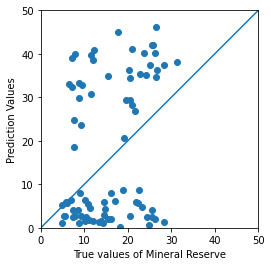

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(y_pred, y_test)
plt.xlabel('True values of Mineral Reserve')
plt.ylabel('Prediction Values')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
model.evaluate(X_test)

3/3 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - mse: 0.0000e+00 - mae: 0.0000e+00


[0.0, 0.0, 0.0]

In [ ]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 5ms/step - loss: 314.6677 - mse: 314.6677 - mae: 15.2466


[314.66766357421875, 314.66766357421875, 15.246602058410645]

K - Fold Cross Validation